# Import Libraries 

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [53]:
# Importing the dataset..
train=pd.read_csv("F:/A_number_of_data_science_books/DATASETS/Loan Prediction/train_ctrUa4K.csv")
test=pd.read_csv("F:/A_number_of_data_science_books/DATASETS/Loan Prediction/test_lAUu6dG.csv")

In [80]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(array([422.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 192.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

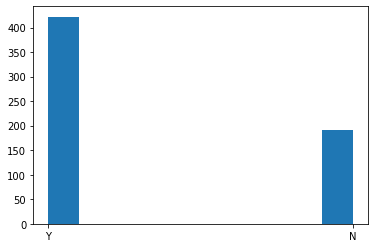

In [57]:
plt.hist(train['Loan_Status'])

In [58]:
print((train["Loan_Status"] =="Y").value_counts())

True     422
False    192
Name: Loan_Status, dtype: int64


In [59]:
422/(422+192) *100
# 68.72964169381108 is the percentage  of loan status we need to more than that model to predict..

68.72964169381108

In [60]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
train[train["Gender"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [62]:
train[train["Married"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [63]:
train[train["Dependents"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [64]:
train[train["Self_Employed"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [65]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [66]:
train[train["LoanAmount"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [67]:
train[train["Loan_Amount_Term"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [68]:
train[train["Credit_History"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [220]:
train_original=train.copy()
test_original=test.copy()

In [221]:
train.shape,test.shape

((614, 14), (367, 13))

# Univaraite analysis.

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

In [ ]:
#Target Variable..
train["Loan_Status"].value_counts()

In [ ]:
# Normalize can be set to True to print proportions instead of number...

train["Loan_Status"].value_counts(normalize=True)

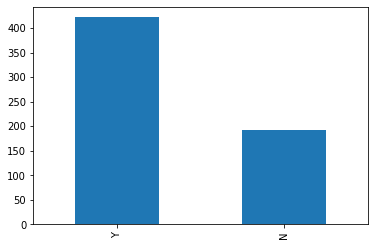

In [76]:
train["Loan_Status"].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)
Let’s visualize the categorical and ordinal features first

# categorical Variable

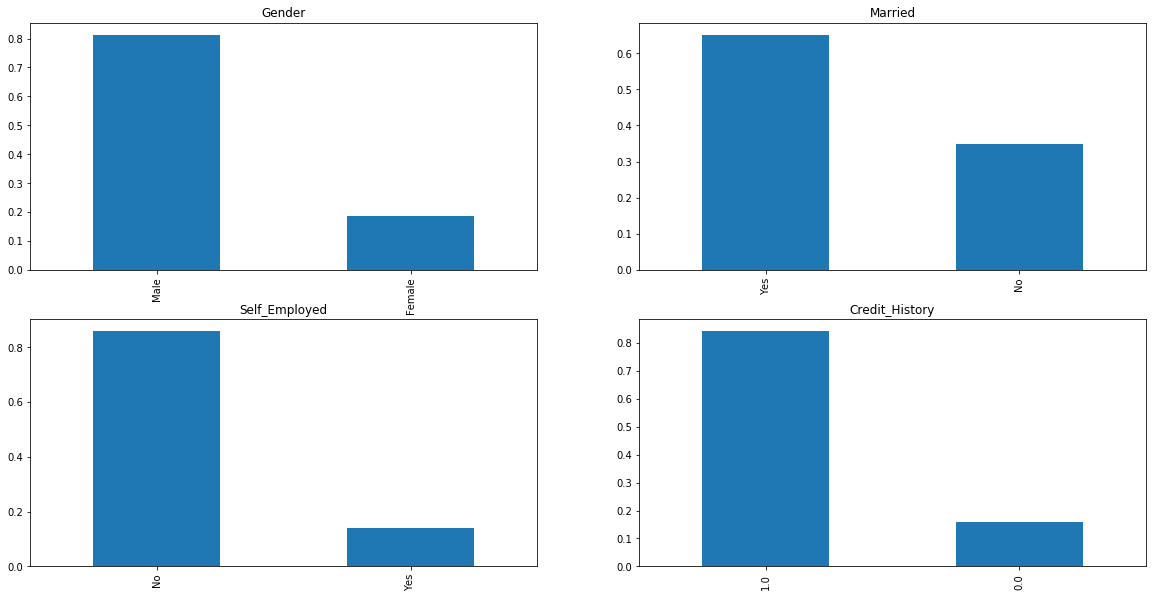

In [79]:
#Independent Variable (Categorical)
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10) ,title="Gender")


plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(figsize=(20,10) ,title="Married")


plt.subplot(223)
train["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(20,10) ,title="Self_Employed")

plt.subplot(224)
train["Credit_History"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")
plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts

# Now let’s visualize the ordinal variables.

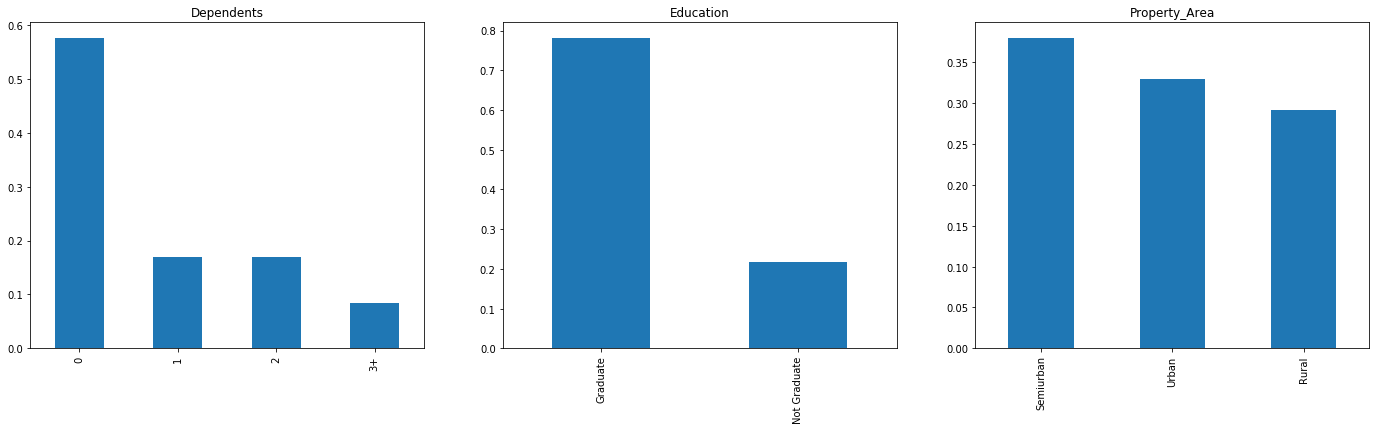

In [89]:
#Independent Variable(ordinal..)
plt.figure(1)

plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")



plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Education")

plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Property_Area")
plt.show()

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

# Independent Variable (Numerical) 

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.

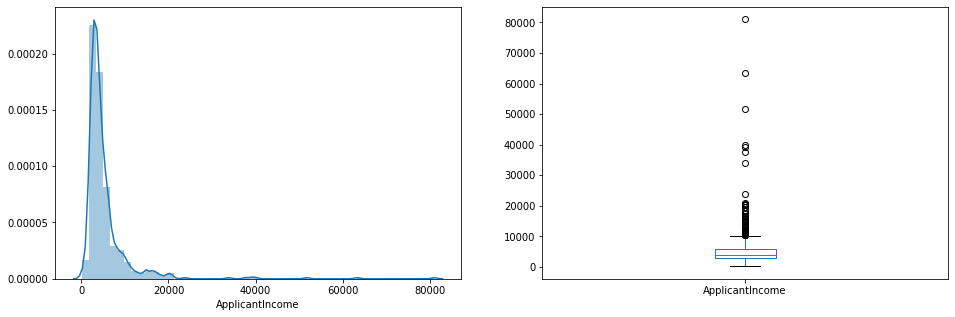

In [93]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

In [94]:
train["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Text(0.5, 0.98, '')

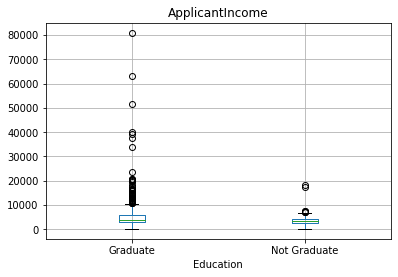

In [98]:
train.boxplot(column="ApplicantIncome" , by="Education")
plt.suptitle("")


We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers

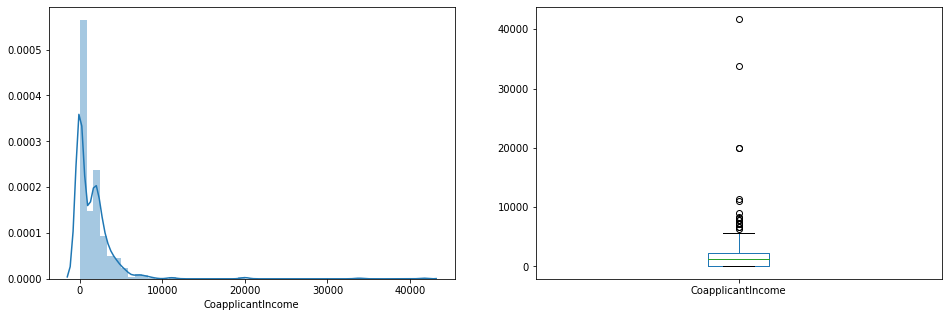

In [100]:
#Let’s look at the Coapplicant income distribution....
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed

In [105]:
train["CoapplicantIncome"].describe()


count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

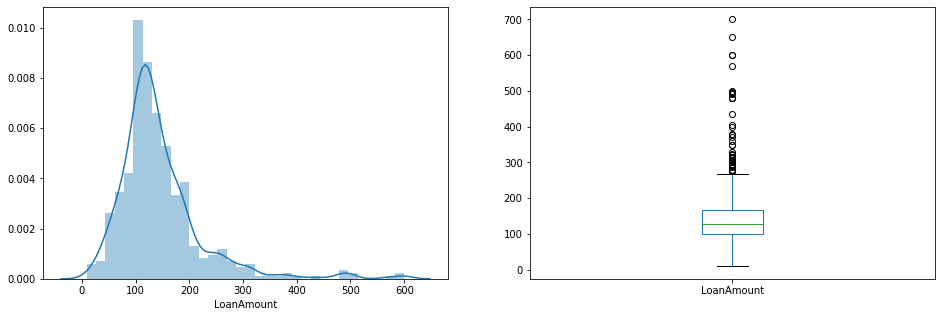

In [110]:
#Let’s look at the distribution of LoanAmount variable...
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df["LoanAmount"]);
plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# Bivariate Analysis

Lets recall some of the hypotheses that we generated earlier:

Applicants with high income should have more chances of loan approval.
Applicants who have repaid their previous debts should have higher chances of loan approval.
Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

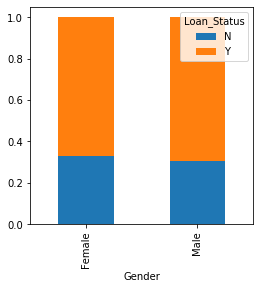

In [115]:
Gender= pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.




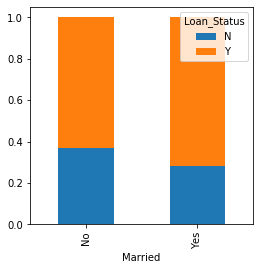

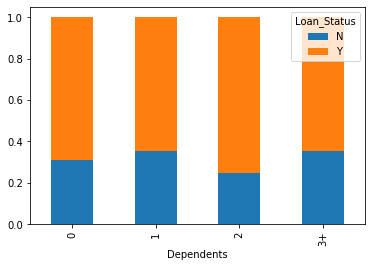

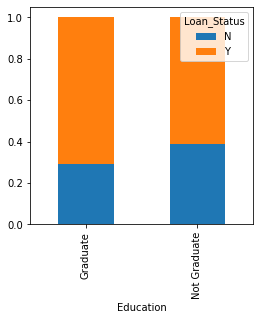

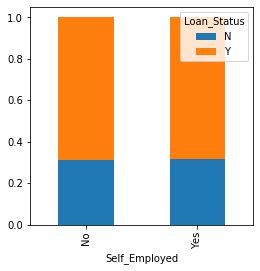

In [116]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 

Education=pd.crosstab(train['Education'],train['Loan_Status']) 

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

Proportion of married applicants is higher for the approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

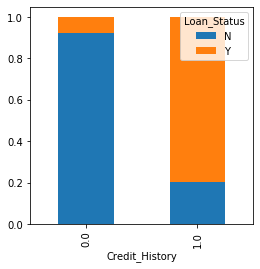

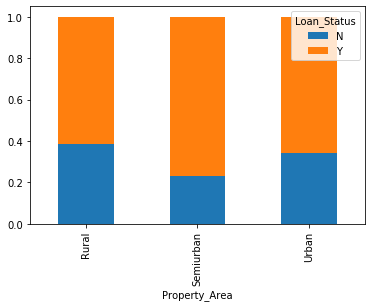

In [118]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.
Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

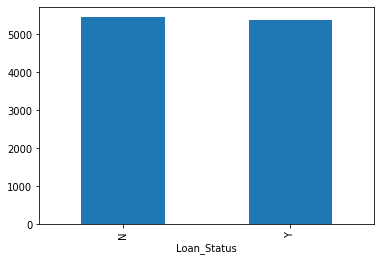

In [121]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()


Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

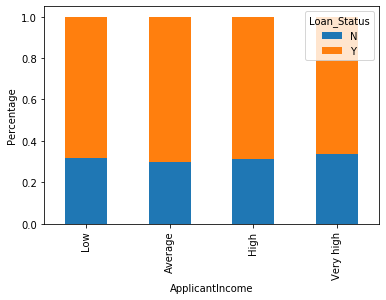

In [123]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')


It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

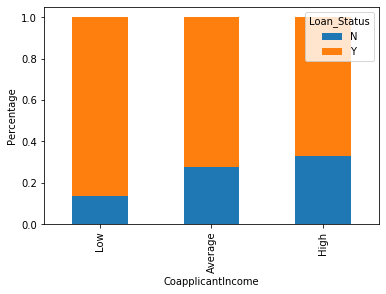

In [124]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')


It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

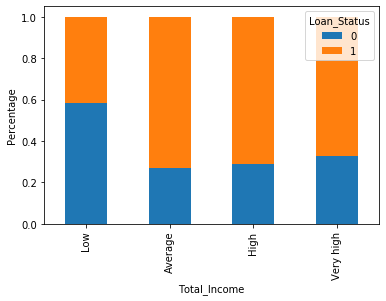

In [134]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')



We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

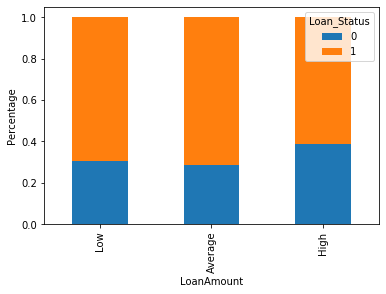

In [135]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')


It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [137]:
train=train.drop([ 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)
#Now lets look at the correlation between all the numerical

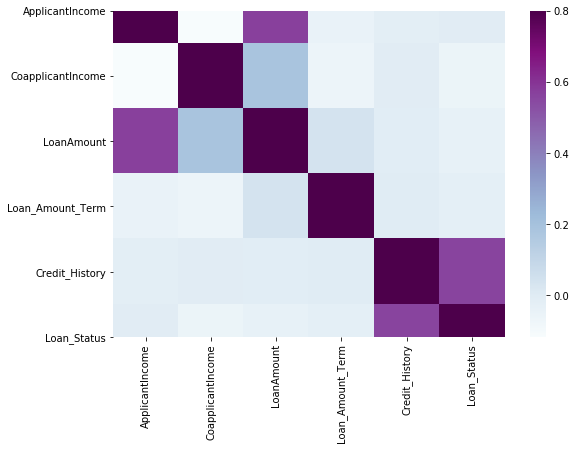

In [140]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");


We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.




# Missing values and outliers treatment

In [141]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

In [142]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [143]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [145]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [146]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [147]:
train.isnull().sum().any()   # no null values are present ...

False

# Filling the NAs in the test dataset with same approach..


In [148]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Outlier Treatment

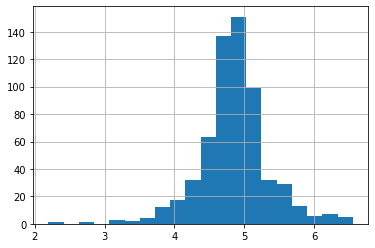

In [149]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

# Model Building ..

In [153]:
df1=train.drop('Loan_ID', axis=1)
df2=test.drop('Loan_ID', axis=1)

In [157]:
x=df1.drop('Loan_Status',axis=1)
y=train.Loan_Status

In [162]:
X=pd.get_dummies(x)

In [166]:
test1=pd.get_dummies(df2)

In [168]:
test1.shape , X.shape

((367, 21), (614, 21))

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_vc=train_test_split(X,y , test_size=.3)

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [181]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
pred_cv=model.predict(x_cv)

In [183]:
# check the accuaracy...
accuracy_score(y_vc,pred_cv)

0.7675675675675676

# prediction for the test data set..

In [184]:
pred_test=model.predict(test1)

In [264]:
submission=pd.read_csv("F:/A_number_of_data_science_books/DATASETS/Loan Prediction/sample_submission_49d68Cx.csv")

In [197]:
submission['Loan_Status']=pred_test

In [198]:
submission['Loan_ID']=test_originnal['Loan_ID']

convert the submission dataframe to .csv format and submit the prediction...

In [199]:
# convert Loan_status to the Y and N from 1 and 0 format...
submission['Loan_Status'].replace(0,'N' , inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [ ]:
submission.drop()

In [206]:
pd.DataFrame(submission, columns=['Loan_ID' , 'Loan_Status']).to_csv('F:/A_number_of_data_science_books/DATASETS/Loan Prediction/logistic.csv')

In [203]:
df=pd.read_csv('F:/A_number_of_data_science_books/DATASETS/Loan Prediction/logistic.csv')

In [205]:
df.drop('Unnamed: 0' , axis =1)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [201]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Logistic Regression using stratified k-folds cross validation

In [207]:
from sklearn.model_selection import StratifiedKFold

In [213]:
i = 1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} od KFold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model2=LogisticRegression()
    model2.fit(xtr,ytr)
    pred_test_1= model2.predict(xvl)
    score1=accuracy_score(yvl,pred_test_1)
    print('accuracy_score',score1)
    i+=1
    pred_test_2=model.predict(test1)
    pred=model.predict_proba(xvl)[:,1]
    
    


1 od KFold 5
accuracy_score 0.8048780487804879


C:\Users\acer pc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



2 od KFold 5
accuracy_score 0.8373983739837398

3 od KFold 5
accuracy_score 0.7804878048780488

4 od KFold 5


C:\Users\acer pc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.7886178861788617

5 od KFold 5
accuracy_score 0.7950819672131147


C:\Users\acer pc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


the mean accuracy for the model is turn out to be 80.1. Let visualise with the roc curve.

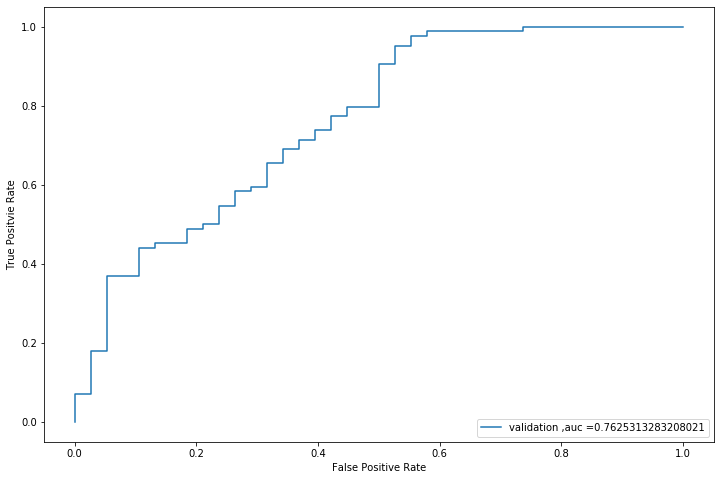

In [217]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation ,auc ='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positvie Rate')
plt.legend(loc=4)
plt.show()

We got an auc value is 0.76

In [266]:
submission['Loan_Status']=pred_test_2
submission['Loan_ID']=test_originnal['Loan_ID']


In [269]:
# convert Y for 1 and N for 0 ..
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

Lets convert the submission in the .csv file and submit the result for the prediction... 

In [272]:
pd.DataFrame(submission , columns=['Loan_ID' , 'Loan_Status']).to_csv('F:/A_number_of_data_science_books/DATASETS/Loan Prediction/Stratified_logistic.csv')

from this submission we get accuracy of .77

In [ ]:
################################################################################################################################